`A4 : 210 x 297 mm`

In [1]:
from speckle_pattern import generate_and_save, generate_lines, generate_checkerboard
import matplotlib.pyplot as plt
%matplotlib inline

# Pattern of vertical or horizontal lines

In [2]:
W = 100 # width of printed image, [mm]
H = 50 # height of printed image, [mm]
dpi = 200

line_width = 5. # line width in printed image, [mm]
N_lines = None # number of lines - if None, use line width defined above
orientation = 'vertical' # choose 'vertical0 or 'horizontal' line orientation

out_path = f'example_lines_{orientation}.jpg' # output image name (TIFF or JPEG)

In [3]:
lines = generate_lines(H, W, dpi, line_width, path=out_path, orientation=orientation, N_lines=N_lines)

Image saved to example_lines_vertical.jpg.


c:\Users\u0173425\speckle_pattern_WT\venv\Lib\site-packages\imageio\v2.py:214: UserWarning: V3 Plugins currently don't have a uniform way to write metadata, so any metadata is ignored.
  warnings.warn(


Preview:

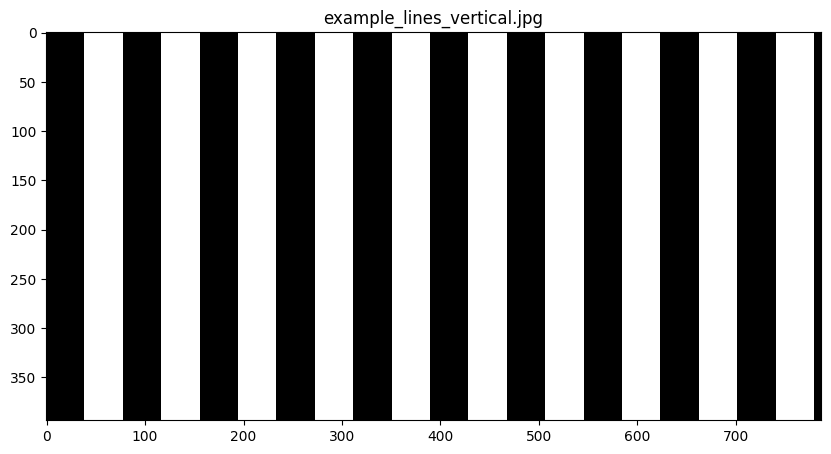

In [4]:
plt.figure(figsize=(10, int(W/H*10)))
plt.imshow(lines, cmap='gray', interpolation='nearest')
plt.title(out_path);

# Checkerboard pattern

In [5]:
out_path= 'example_checkerboard.jpg'
checkerboard = generate_checkerboard(H, W, dpi, 
                                     path=out_path, line_width=4)

Image saved to example_checkerboard.jpg.


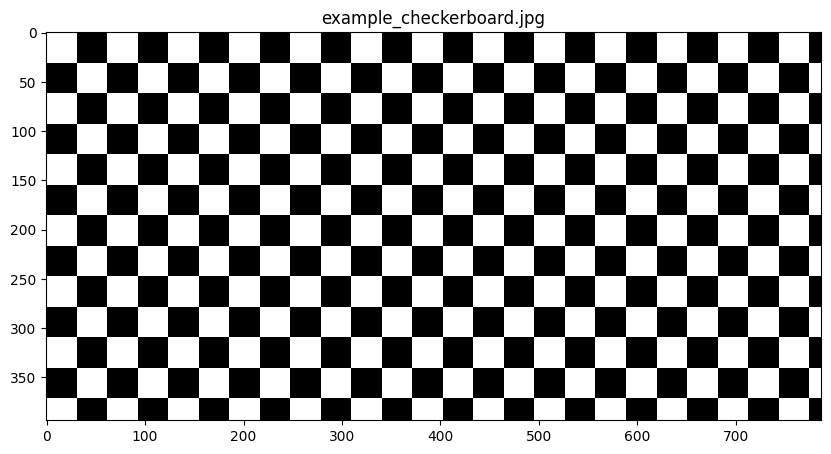

In [6]:
plt.figure(figsize=(10, int(W/H*10)))
plt.imshow(checkerboard, cmap='gray', interpolation='nearest')
plt.title(out_path);

# Speckle pattern

In [7]:
W = 100 # width of printed image, [mm]
H = 50 # height of printed image, [mm]
D = 3. # approximate speckle diameter, [mm]
dpi = 200

out_path = 'example.tiff' # # output image name (TIFF or JPEG)

size_randomness = 0.3 # set higher for more speckle size variety
position_randomness = 1. # set higher for more speckle position variety
speckle_blur = 0.8 # sigma of smothing Gaussian kernel
grid_step = 1.4 # approximate grid step, in terms of speckle diameter `D`

In [8]:
speckle = generate_and_save(H, W, dpi, D,
                            path=out_path,
                            size_randomness=size_randomness,
                            position_randomness=position_randomness,
                            speckle_blur=speckle_blur,
                            grid_step=grid_step)

Random speckle generation complete.


100%|██████████| 432/432 [00:00<00:00, 27291.12it/s]

Image saved to example.tiff.


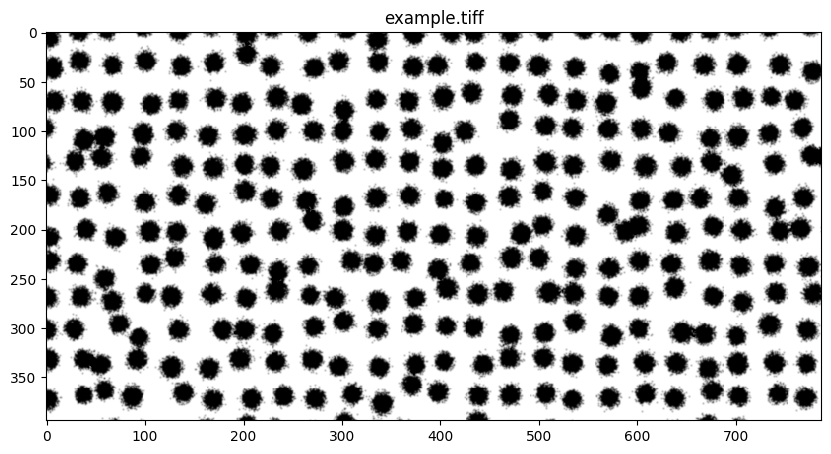

In [9]:
plt.figure(figsize=(10, int(W/H*10)))
plt.imshow(speckle, cmap='gray', interpolation='nearest')
plt.title(out_path);

# Try feature detection on speckle pattern

## ORB corner features

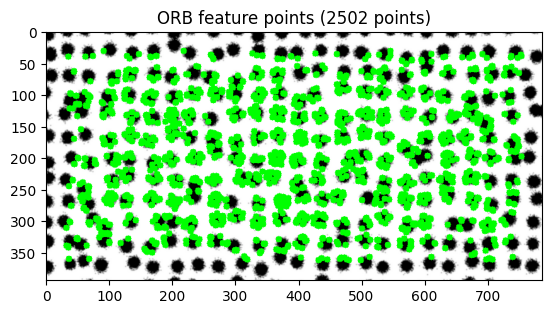

In [10]:
from speckle_pattern.orb import detect_orb, plot_orb
import cv2 as cv
import numpy as np

if speckle.dtype != np.uint8:
    speckle = cv.normalize(speckle, None, 0, 255, cv.NORM_MINMAX)
    speckle = speckle.astype(np.uint8)

# Set detector parameters
orb_detection_parameters = dict(nfeatures = 2500, scaleFactor = 1.2, nlevels = 8, edgeThreshold = 31, firstLevel = 0, WTA_K = 2, scoreType = 0,  patchSize = 31, fastThreshold = 20)

# Detect KAZE features in the speckle image
points_orb, kp_orb, des_orb = detect_orb(speckle, orb_parameters=orb_detection_parameters, mask = None)

# Plot the features in the image
vis = plot_orb(image = speckle, points=points_orb, display= True)


## KAZE features

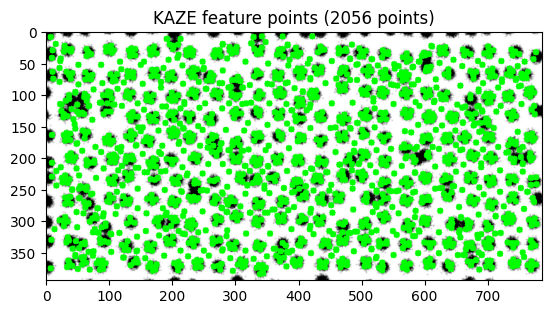

In [11]:
from speckle_pattern.kaze import detect_kaze, plot_kaze
import cv2 as cv
import numpy as np

if speckle.dtype != np.uint8:
    speckle = cv.normalize(speckle, None, 0, 255, cv.NORM_MINMAX)
    speckle = speckle.astype(np.uint8)

# Set detector parameters
kaze_detection_parameters = dict(extended=False, upright=False, threshold= 0.01, nOctaves=4, nOctaveLayers=4, diffusivity=1)

# Detect KAZE features in the speckle image
points_kaze, kp_kaze, des_kaze = detect_kaze(speckle, kaze_parameters=kaze_detection_parameters, mask = None)

# Plot the features in the image
vis = plot_kaze(image = speckle, points=points_kaze, display= True)


## SIFT features

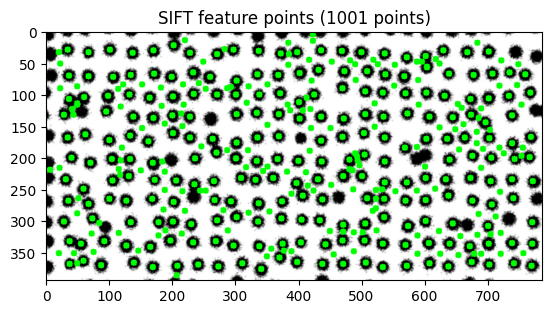

In [12]:
from speckle_pattern.sift import detect_sift, plot_sift
import cv2 as cv
import numpy as np

if speckle.dtype != np.uint8:
    speckle = cv.normalize(speckle, None, 0, 255, cv.NORM_MINMAX)
    speckle = speckle.astype(np.uint8)

# Set detector parameters
sift_detection_parameters = dict(nfeatures=1000, nOctaveLayers=4, contrastThreshold=0.1, edgeThreshold=10, sigma=1.6, descriptorType=cv.CV_32F)

# Detect KAZE features in the speckle image
points_sift, kp_sift, des_sift = detect_sift(speckle, sift_parameters=sift_detection_parameters, mask = None)

# Plot the features in the image
vis = plot_sift(image = speckle, points=points_sift, display= True)
